# Lab 3.01 - The Central Limit Theorem

Import all necessary Python libraries.

In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Probability theory

### Exercise 1 - Probabilities for normal distributions

Calculate the given probabilities in the standard normal distribution $Z \sim Nor(\mu=0, \sigma=1)$. Compare your solutions with the given answers.

|     | Calculate:             | Answer: |
| :-- | :--------------------- | :------ |
| 1.  | $P(Z < 1.33)$          | 0.908   |
| 2.  | $P(Z > 1.33)$          | 0.092   |
| 3.  | $P(Z < −1.33)$         | 0.092   |
| 4.  | $P(Z > −1.33)$         | 0.908   |
| 5.  | $P(Z < 0.45)$          | 0.674   |
| 6.  | $P(Z > −1.05)$         | 0.853   |
| 7.  | $P(Z < 0.65)$          | 0.742   |
| 8.  | $P(−0.45 < Z < 1.20)$  | 0.559   |
| 9.  | $P(−1.35 < Z < −0.10)$ | 0.372   |
| 10. | $P(−2.10 < Z < −0.90)$ | 0.166   |

Het gemiddelde en de standaardafwijking zijn gegeven. Er zijn drie mogelijke opties:

1. Je moet de kans berekenen kleiner dan X. Hiervoor moet je `CDF` of de cumulatieve distributiefunctie gaan aanspreken. Dit is de linkerstaartkans.
2. Je moet de kans berekenen groter dan X. Hiervoor moet je `SF` of de survival function aanspreken. Dit staat gelijk aan `1 - cdf`. Deze functie berekent de rechterstaartkans.
3. Je moet een kans berekenen kleiner dan X1 en groter dan X2. Dit kan je doen door twee linkerstaartkansen te berekenen. Je vermindert de linkerstaartkans van het getal met de grootste X-waarde met die van de kleine X-waarde. Dit staat gelijk aan `CDF(2) - CDF(1)`.

Je gaat bij de methodes ook altijd een loc en scale moeten meegeven. De `loc` is de parameter die dient als gemiddelde. De `scale` is de parameter die dient als standaardafwijking.

In [2]:
m = 0 # gemiddelde
s = 1 # standaardafwijking

#stats.norm.cdf(x, loc=m, scale=s)

# 1
# kleiner dan 1.33 --> cdf
stats.norm.cdf(1.33, loc=m, scale=s)

# 2
# groter dan 1.33 --> sf
x = 1.33
z = (x-m) / s
stats.norm.sf(1.33, loc=m, scale=s)

# 3
# kleiner dan -1.33 --> cdf
stats.norm.cdf(-1.33, loc=m, scale=s)

# 4
# groter dan -1.33 --> sf
stats.norm.sf(-1.33, loc=m, scale=s)

# 5
# kleiner dan -0.45 --> cdf
stats.norm.cdf(0.45, loc=m, scale=s)

# 6
# groter dan -1.05 --> sf
stats.norm.sf(-1.05, loc=m, scale=s)

# 7
# kleiner dan 0.65 --> cdf
stats.norm.sf(0.65, loc=m, scale=s)

# 8
# tussen 1.20 en -0.45
# grootste waarde eerst en dan verminderen met de kleinere waarde
(stats.norm.cdf((1.20), loc=m, scale=s) - stats.norm.cdf(-0.45, loc=m, scale=s))

# 9
# tussen -0.10 en -1.35
# grootste waarde eerst en dan verminderen met de kleinere waarde
(stats.norm.cdf((-0.10), loc=m, scale=s) - stats.norm.cdf(-1.35, loc=m, scale=s))

# 10
# tussen -0.9 en -2.1
(stats.norm.cdf((-0.90), loc=m, scale=s) - stats.norm.cdf(-2.10, loc=m, scale=s))

print('\n')


### Oefening 2
Hieronder maken we een plot van zowel de cumulatieve als de normaalverdeling met  $\mu = 2.5$ and $\sigma = 1.5$. Daarnaast berekenen we ook de two-tailed test van x=0.5  and  x=4 . Het antwoord is hier 0.750. Een plot opstellen doen we met de matplotlib library. De methode `plt.plot` vereist twee waarden: x en y.

1. Om een even verdeling te genereren kunnen we werken met `np.linspace`. Deze methode vraagt minstens drie parameters: Het begin, het einde en het aantal getallen dat gegenereerd moet worden. Per standaard zal dit altijd 50 zijn, maar dit kan je weglaten. Dit slaan wij op onder de `X`-waarde. Deze X-waarden kunnen wij hergebruiken voor de tweede verdeling.

2. De Y-waarde hangt af van welke verdeling wij willen zien. Hiervoor spreken wij de `PDF`-functie aan voor een normaalverdeling en `CDF` voor een cumulatieve verdeling.

3. Eenmaal we de X en Y waarde hebben kunnen we de plots gaan tekenen. Hiervoor geven we de X- en Y waarde mee.

0.750133526342675

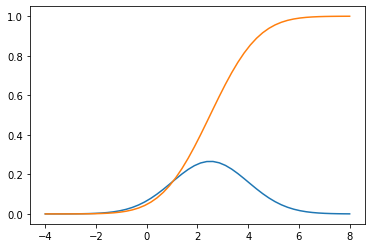

In [4]:
# gemiddelde en standaardafwijking
m = 2.5
s = 1.5

# prob. dens. function
x = np.linspace(-4, +8)
y = stats.norm.pdf(x, m, s)
plt.plot(x, y)


# cumulatieve distribution function
y = stats.norm.cdf(x, loc=m, scale=s)
plt.plot(x,y)

# area
(stats.norm.cdf(4, loc=m, scale=s) - stats.norm.cdf(0.5, loc=m, scale=s))





### Oefening 3 - Student-T verdeling en een normaalverdeling.

Nu maken wij cumulatieve verdeling, normaalverdeling en een `Student-T verdeling`. Voor de T-verdeling maken wij gebruik van een `degrees of freedom van 3`. Voor de drie verdelingen gebruiken we opnieuw $\mu=0$ en $\sigma=1$

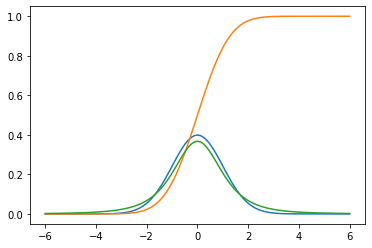

In [6]:
m = 0
s = 1

# normaalverdeling
x = np.linspace(-6, +6, num=101)
y = stats.norm.pdf(x, m, s)
plt.plot(x, y)

# cumulatieve distributie
y = stats.norm.cdf(x, loc=m, scale=s)
plt.plot(x,y)

y = stats.t.pdf(x, 3)
plt.plot(x, y, label="df=3")

### Oefening 4 - Kansberekening en de centrale limietstelling.
We kunnen de centrale limietstelling uittesten door drie verschillende datasets te genereren. We gaan opmerken dat de verdeling bij 25 getallen sterk zal afwijken bij die van 2500 getallen.

Een willekeurige dataset genereren kan je doen met de functie `np.random.normal()` van Numpy. Hier geef je het gemiddelde, de standaardafwijking en het aantal getallen mee dat je wilt genereren.

Als volgt kunnen we met Seaborn een histogram of `histplot` gaan plotten voor de zonet gegenereerde waarden. Als extra kan je ook de parameter `kde` gaan meegeven wat een lijn zal genereren dat de verbuiging tussen de waarden zal accentueren.

Bij de dataset van 25 waarden gaan we zien dat we nog niet genoeg getallen hebben. De uitkomst zal hier sterk variëren bij iedere keer dat we een nieuwe dataset genereren. Bij 250 waarden zal dit lichtjes een normaalverdeling worden, al merken we nog steeds een onvoorspelbaar gedrag. Uiteindelijk zien we bij 2500 waarden dat het gedrag heel sterk lijkt op die van een normaalverdeling.

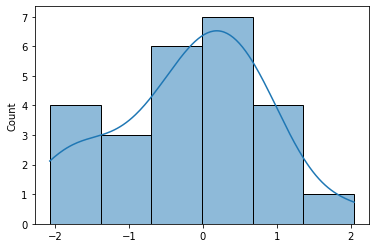

In [ ]:
# n = het aantal getallen
n = 25
histogram = np.random.normal(loc=m, scale=s, size=n)
obs_hist = sns.histplot(histogram, kde=True)

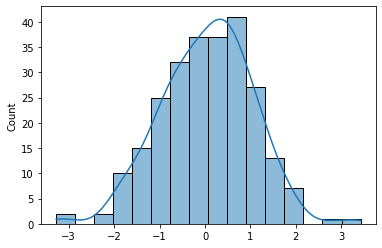

In [ ]:
n = 250
histogram = np.random.normal(loc=m, scale=s, size=n)
obs_hist = sns.histplot(histogram, kde=True)

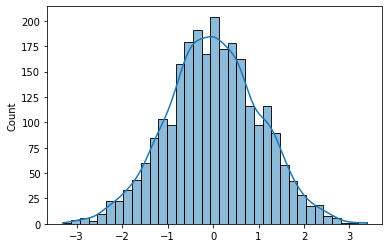

In [ ]:
n = 2500
histogram = np.random.normal(loc=m, scale=s, size=n)
obs_hist = sns.histplot(histogram, kde=True)

### Oefening 5 

Uit een onderzoek hebben we gezien dat  bij vrouwen tussen 20 en 29 het gemiddelde cholesterol `183 mg/dl` is. De standaardafwijking was hier gelijk aan `36`. We nemen een `willekeurige sample bij 81` vrouwen.

1. Plot eerst de kansverdeling van het steekproefgemiddelde $\overline{x}$.
2. Wat is de kans dat het steekproefgemiddelde $\overline{x} < 185$? (Answer ≈ 69,1%)
3. Wat is de kans dat het steekproefgemiddelde tussen $175 < \overline{x} < 185$ (Answer ≈ 66,9%)
4. Wat is de kans dat het steekproefgemiddelde $\overline{x} > 190$ (Answer ≈ 4,0%)


Om het steekproefgemiddelde te berekenen heb je het initiele gemiddelde, het aantal mensen bij de steekproef en de standaardafwijking nodig. We moeten eerst de standaardafwijking van de steekproef gaan berekenen. Dit door de standaardafwijking te delen door de vierkantswortel van het aantal mensen bij de steekproef.

2. P(X < 185) ~= 0.691
3. P(175 < X < 185) ~= 0.669
4. P(190 > x) ~= 0.040


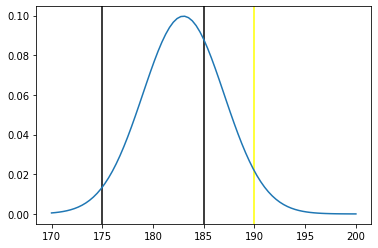

In [7]:
# variabelen aanmaken
m = 183
s = 36
n = 81

# de sample is 81 mensen groot -- vierkantswortel nemen van de grootte van de sample
sn = 36 / 9

# plot opstellen
x = np.linspace(170, +200, num=n)
y = stats.norm.pdf(x, m, sn)

# Verticale lijnen plotten
plt.axvline(175, color="black")
plt.axvline(185, color="black")
plt.axvline(190, color="yellow")
plt.plot(x, y)

# Berekening van de kans dat het steekproefgemiddelde in een bereik valt.
vraag2 = stats.norm.cdf(185, loc=m, scale=sn)
vraag3 = (stats.norm.cdf(185, loc=m, scale=sn)) - (stats.norm.cdf(175, loc=m, scale=sn))
vraag4 = stats.norm.sf(190, loc=m, scale=sn)

print(f'2. P(X < 185) ~= %.3f' % stats.norm.cdf(185, loc=m, scale=sn))
print(f'3. P(175 < X < 185) ~= %.3f' % vraag3)
print(f'4. P(190 > x) ~= %.3f' % stats.norm.sf(190, loc=m, scale=sn))

### Oefening 6

Een willekeurige sample van 64 mensen wordt verzameld. Het gemiddelde en de standaardafwijking van de populatie zijn gekend: $\mu = 20$ and $\sigma = 16$.

1. Plot de kansverdeling van het steekproefgemiddelde.
2. Bereken de z-score voor $\overline{x_1} = 15.5$  
3. Bereken de z-score voor $\overline{x_2} = 23$ 
4. Bereken de kans dat het steekproefgemiddelde $\overline{x}$  tussen 15.5 en 22 ligt. (Answer ≈ 81.9%)

De *Z-score* dient om te meten hoe ver een bepaald punt ligt van het gemiddelde. Daarnaast is het een meting om te zien hoeveel standaardafwijkingen het punt verwijderd ligt van het populatiegemiddelde. Een Z-score zal variëren van `-3 tot +3`. Hoe dichter bij nul, hoe dichter het punt ligt bij het gemiddelde. Om de z-score te gebruiken moet je weten wat het gemiddelde en wat de standaardafwijking van de populatie is. De score kan je gebruiken als een manier om resultaten met een normale populatie te vergelijken.

De Z-score bereken je door het punt te verminderen met het populatiegemiddelde en dat verschil te delen door de standaardafwijking ofwel `z = (x – μ) / σ`.


De z-score op vraag 2 is -2.250
De z-score op vraag 3 is 1.500
De kans dat het steekproefgemiddelde tussen 15.5 en 22 ligt is 81.86%


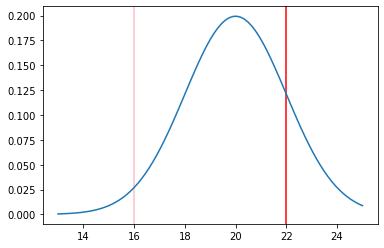

In [12]:
m = 20
s = 16
n = 64

import math

sn = s / math.sqrt(n)

# Plot maken
x = np.linspace(13,25,num=81)
y = stats.norm.pdf(x,m,sn)
plt.axvline(22,color="red")
plt.axvline(16,color="pink")
plt.plot(x,y)

# z-score: (x - m)/sn
zscore1 = (15.5-m)/sn
zscore2 = (23-m)/sn

# schatting
# gebied van volledig links tot 22 verminderen met het gebied van volledig links tot 16
kansSteekproefgemiddelde = stats.norm.cdf(22,loc=m,scale=sn) - stats.norm.cdf(16,loc=m,scale=sn)

print(f'De z-score op vraag 2 is {zscore1:.3f}')
print(f'De z-score op vraag 3 is {zscore2:.3f}')
print(f'De kans dat het steekproefgemiddelde tussen 15.5 en 22 ligt is {kansSteekproefgemiddelde:.2%}')


## Betrouwbaarheidsintervallen

## rlanders
We laden de dataset in. We veronderstellen dat het $\mu$ niet gekend is, maar dat de standaardafwijking wel gekend is. De $\sigma = 98$.


In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/rlanders.csv').set_index(['ID'])
df.head()

,Gender,Money,Days,Months,Count,Survey
ID,,,,,,
1,Female,440,29,11,35,3
2,Female,503,23,10,52,3
3,Male,412,16,11,55,3
4,Male,587,25,9,28,5
5,Male,525,30,11,41,4


Bereken een betrouwbaarheidsinterval van 99% voor het populatiegemiddelde. Het resultaat moet [484.191, 516.121] zijn.

Het gemiddelde is niet gekend, maar dit kunnen we wel berekenen aan de hand van de gegeven dataset. De standaardafwijking is hier gegeven, maar ook dit kunnen we berekenen mocht dit niet een gegeven zijn. De waarde voor n is niet gegeven, maar dit berekenen we door de shape op te vragen van de dataset. We vragen het aantal rijen op wat overeenkomt met het aantal steekproeven. 

We willen een betrouwbaarheidsinterval van 99% hebben dus onze alphawaarde zal gelijkstaan aan `1 - percentage` wat hier dus `0.01` zal zijn. Omdat dit percentage over zowel de linker- als de rechterzijde moet worden gespreid, gaan we enkel de helft van deze 0.01 bijhouden. De z-score berekenen we met behulp van de `isf methode` ofwel de omgekeerde survival functie. 

Het interval berekenen doen we met behulp van de formule `m +- z * s / np.sqrt(n)`. Met deze formule moet je het gemiddelde gaan verminderen/vermeerderen met de z-score en dit verschil gaan vermenigvuldigen met de standaardafwijking. Dit deel je dan door de vierkantswortel van het aantal.

In [18]:
# we kennen het gemiddelde niet -- berekenen adhv de dataset
m = df['Money'].mean()

# std is een gegeven
# indien de standaardafwijking niet gegeven is -- df['Money'].std()
s = 98 

# aantal rijen opvragen
n = df.shape[0]

# 99% interval -- alpha moet 0.01 zijn
alpha = 0.01

# Z berekenen
z = stats.norm.isf(alpha/2)

# interval berekenen
lo = m - z * s / np.sqrt(n)
hi = m + z * s / np.sqrt(n)

print(f'Interval: [%.3f,%.3f]' % (lo,hi))

Interval: [484.191,516.121]


Bereken een betrouwbaarheidsinterval van 95%. Het resultaat is [488.008, 512.304].

In [20]:
# we kennen het gemiddelde niet -- berekenen adhv de dataset
m = df['Money'].mean()

# std is een gegeven
# indien de standaardafwijking niet gegeven is -- df['Money'].std()
s = 98 

# 95% interval -- alpha moet 0.05 zijn
alpha = 0.05

# Z berekenen
z = stats.norm.isf(alpha/2)

# interval berekenen
lo = m - z * s / np.sqrt(n)
hi = m + z * s / np.sqrt(n)

print(f'Interval: [%.3f,%.3f]' % (lo,hi))

Interval: [488.008,512.304]


Bereken een betrouwbaarheidsinterval van 95%, maar ga er vanuit dat de standaardafwijking niet gekend is. Het resultaat is answer = [487.319, 512.993]

In [21]:
# we kennen het gemiddelde niet -- berekenen adhv de dataset
m = df['Money'].mean()

# std is zogezegd geen gegeven
s = df['Money'].std()

# aantal rijen opvragen
n = df.shape[0]

# 95% interval -- alpha moet 0.05 zijn
alpha = 0.05

# Z berekenen
z = stats.norm.isf(alpha/2)

# interval berekenen
lo = m - z * s / np.sqrt(n)
hi = m + z * s / np.sqrt(n)

print(f'Interval: [%.3f,%.3f]' % (lo,hi))

Interval: [487.381,512.931]


Stel dat we enkel werken met de eerste 25 observaties van de dataset. Wat is het interval? Bereken een 95% confidence interval met als resultaat: [450.291,536.669]

Als we de sample verkleinen tot een grootte van minder dan 30 moeten wij niet via `stats.norm.`, maar wel met `stats.t.isf` gaan werken. We moeten de T-test gebruiken in dit geval.

In [22]:
# eerste 25 observaties van de dataset ophalen
sample = df.head(25)

# we kennen het gemiddelde niet -- berekenen adhv de dataset
m = sample['Money'].mean()

# std is zogezegd geen gegeven
s = sample['Money'].std()

# aantal rijen opvragen
n = sample.shape[0]

# 95% interval -- alpha moet 0.05 zijn
alpha = 0.05

# sample is kleiner dan 30 --> T-verdeling gebruiken
z = stats.t.isf(alpha/2,df=n-1)

lo = m-z*s/np.sqrt(n)
hi = m+z*s/np.sqrt(n)

print(f'Interval: [%.3f,%.3f]' % (lo,hi))

Interval: [450.291,536.669]
